### Problem 2
#### a)

Kelvin assumed the instantaneous cooling half-space model.

$
\begin{equation}
T(z) = T_s + (T_m - T_s) \; erf \big(\frac{z}{s \sqrt{\kappa t}}\big)
\end{equation}
$

Therefore the surface heat flow is given as

$
\begin{equation}
\begin{split}
q_0 &= -k \frac{dT}{dz} \bigg| _{z=0} \\
    &= -k \frac{T_m - T_s}{\sqrt{\pi \kappa t}}
\end{split}
\end{equation}
$

Let's use the values, $q_0 = 67mW/m^{2},\; k = 2000mW/m\cdot K,\; \kappa = 10^{-6} m^{2}/s,\; T_m - T_s = 1700K$

$
\begin{equation}
t = \frac{(T_m - T_s)^2 k^2}{\pi \kappa {q_0}^{2}}
\end{equation}
$

In [14]:
q0 = 67
k = 2000
kappa = 1e-6
dt = 1700
pi = 3.141592

t = dt**2 * k**2 / (pi*kappa* q0**2)

# convert from sec to Myears
print (t/3.1557e7*1e-6, 'Myrs')

25.975429453699338 Myrs


#### b)
He considered only conduction as a process of heat loss. However, in real Earth, convection also occurs.

### Problem 3
#### d)

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [70]:
v = 5.0 * 0.01 / 3.1536e7 # 5 cm/yr to 5 m/sec.
rho = 3300.0 # kg/m^3
cp = 1000.0 # J/kg/K
k = 3.0 #
T1 = 1300.0 # K
T0 = 0.0

time = np.linspace(0, 130, 131)

In [71]:
# Data from the table
q_data = np.array([47.31, 65.73, 56.94, 100.48, 176.26, 166.22, 172.50, 119.32, 38.52, 239.48, 267.96])
t_data = np.array([130, 95, 85, 17.5, 7.5, 7.5, 7.5, 15, 50, 5.25, 3.5])

In [77]:
L = 100e3
R = 0.5 * rho * cp * v * L / k
q1 = k * (T1 - T0) / L * (1.0 + 2.0 * np.exp(-((v/L) * (np.sqrt(R**2+(np.pi)**2)-R))*time))

In [78]:
L = 150e3
R = 0.5 * rho * cp * v * L / k
q2 = k * (T1 - T0) / L * (1.0 + 2.0 * np.exp(-((v/L) * (np.sqrt(R**2+(np.pi)**2)-R))*time))

<IPython.core.display.Javascript object>


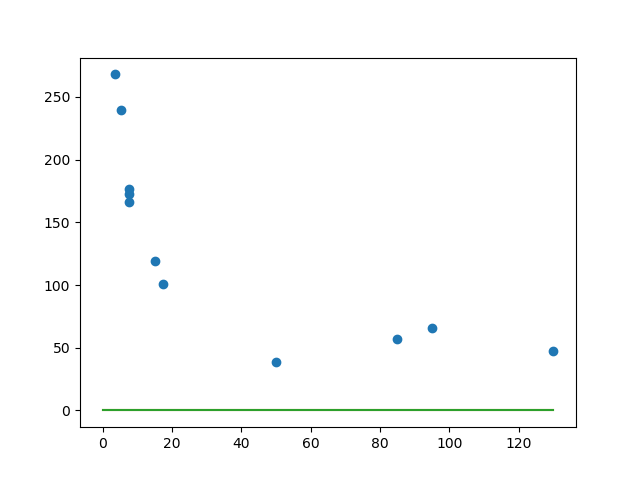

In [80]:
plt.plot(t_data, q_data, 'o', label='observations')
plt.plot(time, q1)
plt.plot(time, q2)

What is this...?

### Problem 5
#### b)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy.special import erf

In [32]:
tau = 5e3*365*24*3600
kappa = 1e-6
k = 3.3
T0 = 283.0
DT = 20.0
beta = 0.0015

y = np.linspace(0.0, 2.0e3, 100)
t1 = np.linspace(-tau, 0.0, 100)
t2 = np.linspace(0.0, tau, 100)

#first case
t = -0.5*tau

T1 = (T0-DT) + beta*y + DT*erf(0.5*y/np.sqrt(kappa*(t+tau)))
q1 = -k*(beta+(DT/np.sqrt(np.pi*kappa*(t+tau)))*np.exp(-(0.5*y/np.sqrt(kappa*(t+tau)))**2))

#second case
t = 0.5*tau

T2 = T0 - DT*erf(0.5*y/np.sqrt(kappa*t)) + beta*y + DT*erf(0.5*y/np.sqrt(kappa*tau))
q2 = -k*(beta+(DT/np.sqrt(np.pi*kappa*tau))*np.exp(-(0.5*y/np.sqrt(kappa*tau))**2)-(DT/np.sqrt(np.pi*kappa*t))*np.exp(-(0.5*y/np.sqrt(kappa*t))**2))

<IPython.core.display.Javascript object>


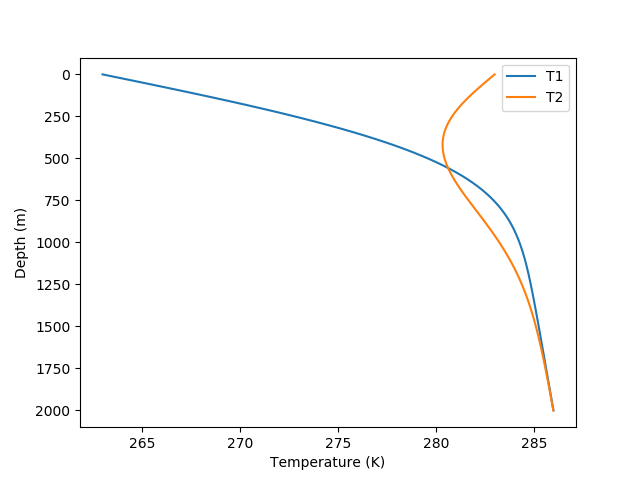

In [34]:
plt.plot(T1, y, '-', label = 'T1')
plt.plot(T2, y, '-', label = 'T2')
plt.ylim(plt.ylim()[::-1])
plt.xlabel('Temperature (K)')
plt.ylabel('Depth (m)')
plt.legend()

<IPython.core.display.Javascript object>


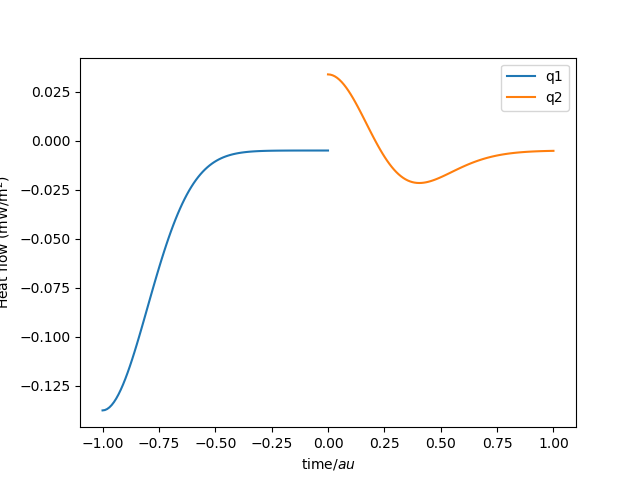

In [38]:
plt.plot(t1/tau, q1, '-', label = 'q1')
plt.plot(t2/tau, q2, '-', label = 'q2')
plt.xlabel('time/$\tau$')
plt.ylabel('Heat flow (mW/m$^{2}$)')
plt.legend()